# **The battle of Neighborhoods**

### **Restaurant recommender system in Bangalore**

#### **Importing labraries :**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv('../input/dataset/complete_dataset.csv')

In [6]:
df.head()

,Unnamed: 0,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,0,Central,Cantonment area,12.972442,77.580643,866377,Bangalore,18944.099792
1,1,Central,Domlur,12.960992,77.638726,743186,Bangalore,56837.022198
2,2,Central,Indiranagar,12.971891,77.641151,474289,Bangalore,41991.817435
3,3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,Bangalore,6667.447632
4,4,Central,Malleswaram,13.003100,77.564300,893629,Bangalore,53270.063892


In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

Creating 'Population' and 'Income' dataframe from the main dataframe

In [12]:
bangalore_population = pd.read_csv('../input/dataset/population_dataset.csv')
bangalore_population = pd.DataFrame(df[['Borough','Neighborhoods','Population']])
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [15]:
bangalore_income = pd.read_csv('../input/dataset/income_dataset.csv')
bangalore_income = pd.DataFrame(df[['Borough','Neighborhoods','AverageIncome']])
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099792
1,Central,Domlur,56837.022198
2,Central,Indiranagar,41991.817435
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063892


In [16]:
bangalore_latitude = df['Latitude'].mean()
bangalore_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Bangalore are : ",bangalore_latitude,bangalore_longitude)

Latitude and Longitude of Bangalore are :  12.962339620312497 77.60175294687502


In [17]:
CLIENT_ID = 'OHR3BAMDFLIM4RRWITDJKNJ03FC3SNSZ5LKBILBCKSZVYHJM' # your Foursquare ID
CLIENT_SECRET = 'YGFFJ1BEUQ0E2PEN5C2YAVRXK0BXJTBSC35C0RLS1G21Q42V' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 150

Unique Borough

In [18]:
df['Borough'].unique()

array(['Central', 'Eastern', 'NorthEastern', 'Northern', 'SouthEastern',
       'Southern', 'SouthernSuburbs', 'Western'], dtype=object)

In [21]:
borough_colors ={}
for i in df['Borough'].unique():
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [22]:
bangalore_map = folium.Map(location=[bangalore_latitude,bangalore_longitude],zoom_start=12,control_scale=True)

In [23]:
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(bangalore_map)

In [24]:
bangalore_map

### **Exploring bangalore Neighborhoods using FourSquare API**

In [25]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [26]:
bangalore_venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])


Fetching venues for :  Cantonment area
Fetching venues for :  Domlur
Fetching venues for :  Indiranagar
Fetching venues for :  Jeevanbheemanagar
Fetching venues for :  Malleswaram
Fetching venues for :  Pete area
Fetching venues for :  Rajajinagar
Fetching venues for :  Sadashivanagar
Fetching venues for :  Seshadripuram
Fetching venues for :  Shivajinagar
Fetching venues for :  Ulsoor
Fetching venues for :  Vasanth Nagar
Fetching venues for :  Bellandur
Fetching venues for :  CV Raman Nagar
Fetching venues for :  Hoodi
Fetching venues for :  Krishnarajapuram
Fetching venues for :  Mahadevapura
Fetching venues for :  Marathahalli
Fetching venues for :  Varthur
Fetching venues for :  Whitefield
Fetching venues for :  Banaswadi
Fetching venues for :  HBR Layout
Fetching venues for :  Horamavu
Fetching venues for :  Kammanahalli
Fetching venues for :  Lingarajapuram
Fetching venues for :  Ramamurthy Nagar
Fetching venues for :  Hebbal
Fetching venues for :  Jalahalli
Fetching venues for :

In [27]:
print("Total number of venues found in Bangalore are : ",bangalore_venues.shape[0])


Total number of venues found in Bangalore are :  588


In [28]:
bangalore_venues.head(5)


,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment area,Central,12.972442,77.580643,Hotel Fishland,12.975569,77.578592,Seafood Restaurant
1,Cantonment area,Central,12.972442,77.580643,Adigas Hotel,12.973554,77.579161,Restaurant
2,Cantonment area,Central,12.972442,77.580643,Sapna Book House,12.976355,77.578461,Bookstore
3,Cantonment area,Central,12.972442,77.580643,Vasudev Adigas,12.973707,77.579257,Indian Restaurant
4,Cantonment area,Central,12.972442,77.580643,Kamat Yatrinivas,12.975985,77.578125,Indian Restaurant


In [29]:
bangalore_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)


Venue Category
Indian Restaurant       107
Café                     29
Fast Food Restaurant     28
Ice Cream Shop           22
Bakery                   20
Pizza Place              20
Restaurant               16
Department Store         16
Coffee Shop              15
Chinese Restaurant       14
Name: Neighborhood, dtype: int64

In [30]:
print("Total number of unique categories in bangalore are : ",len(bangalore_venues['Venue Category'].unique()))


Total number of unique categories in bangalore are :  127


In [31]:
individual_bangalore_venue_count = bangalore_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()
individual_bangalore_venue_count

Borough
Borough Neighborhood                 
Central Cantonment area             5
        Domlur                     13
        Indiranagar                59
        Jeevanbheemanagar           6
        Malleswaram                 8
...                               ...
Western Nagarbhavi                  8
        Nandini Layout              1
        Nayandahalli                3
        Rajarajeshwari Nagar        7
        Vijayanagar                 3

[62 rows x 1 columns]

In [32]:
individual_bangalore_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)
individual_bangalore_venue_count.reset_index(inplace=True)
individual_bangalore_venue_count

,Borough,Neighborhood,NumberOfVenues
0,Central,Cantonment area,5
1,Central,Domlur,13
2,Central,Indiranagar,59
3,Central,Jeevanbheemanagar,6
4,Central,Malleswaram,8
...,...,...,...
57,Western,Nagarbhavi,8
58,Western,Nandini Layout,1
59,Western,Nayandahalli,3
60,Western,Rajarajeshwari Nagar,7


[Text(0, 0, 'Cantonment area'),
 Text(1, 0, 'Domlur'),
 Text(2, 0, 'Indiranagar'),
 Text(3, 0, 'Jeevanbheemanagar'),
 Text(4, 0, 'Malleswaram'),
 Text(5, 0, 'Pete area'),
 Text(6, 0, 'Rajajinagar'),
 Text(7, 0, 'Sadashivanagar'),
 Text(8, 0, 'Seshadripuram'),
 Text(9, 0, 'Shivajinagar'),
 Text(10, 0, 'Ulsoor'),
 Text(11, 0, 'Vasanth Nagar'),
 Text(12, 0, 'Bellandur'),
 Text(13, 0, 'CV Raman Nagar'),
 Text(14, 0, 'Hoodi'),
 Text(15, 0, 'Krishnarajapuram'),
 Text(16, 0, 'Mahadevapura'),
 Text(17, 0, 'Marathahalli'),
 Text(18, 0, 'Varthur'),
 Text(19, 0, 'Whitefield'),
 Text(20, 0, 'Banaswadi'),
 Text(21, 0, 'HBR Layout'),
 Text(22, 0, 'Horamavu'),
 Text(23, 0, 'Kammanahalli'),
 Text(24, 0, 'Lingarajapuram'),
 Text(25, 0, 'Ramamurthy Nagar'),
 Text(26, 0, 'Hebbal'),
 Text(27, 0, 'Jalahalli'),
 Text(28, 0, 'Mathikere'),
 Text(29, 0, 'R. T. Nagar'),
 Text(30, 0, 'Vidyaranyapura'),
 Text(31, 0, 'Yelahanka'),
 Text(32, 0, 'Yeshwanthpur'),
 Text(33, 0, 'BTM Layout'),
 Text(34, 0, 'Bommanahalli

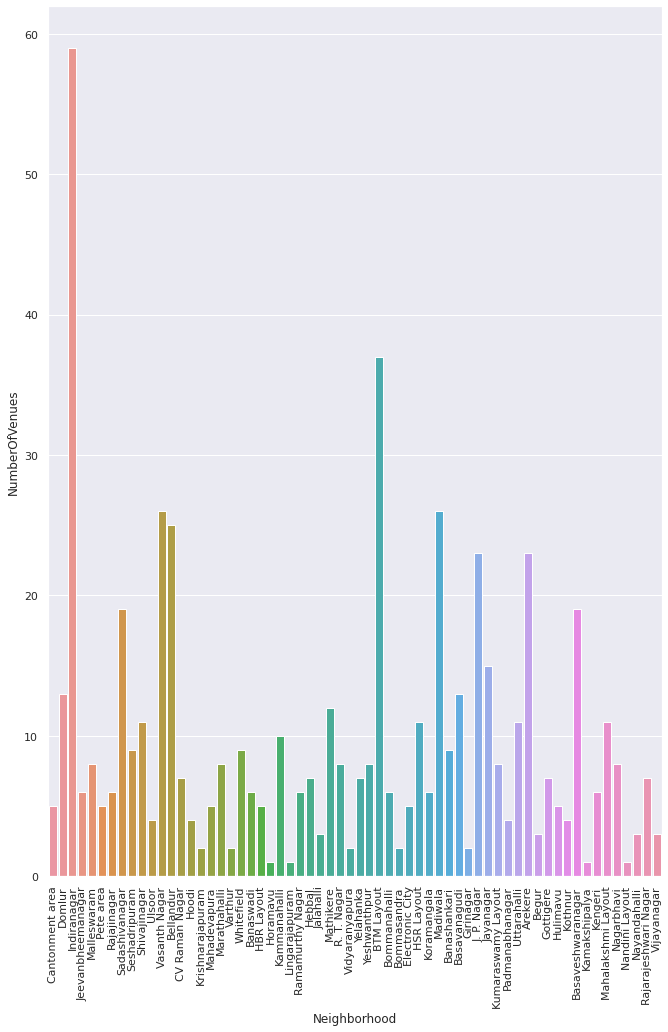

In [33]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_bangalore_venue_count)
plot.set_xticklabels(individual_bangalore_venue_count['Neighborhood'],rotation=90)

In [34]:
bangalore_venues[bangalore_venues['Neighborhood']=='Whitefield']


,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
224,Whitefield,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
225,Whitefield,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
226,Whitefield,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
227,Whitefield,Eastern,12.9698,77.7499,Royal Orchid Suites,12.966774,77.751262,Hotel
228,Whitefield,Eastern,12.9698,77.7499,The river side bar and kitchen,12.967298,77.749614,Hotel Bar
229,Whitefield,Eastern,12.9698,77.7499,Bangalore Mandarin,12.969631,77.750130,Chinese Restaurant
230,Whitefield,Eastern,12.9698,77.7499,Fabindia,12.972156,77.750447,Market
231,Whitefield,Eastern,12.9698,77.7499,Cheenavala,12.966435,77.749368,Kerala Restaurant
232,Whitefield,Eastern,12.9698,77.7499,refresh,12.965621,77.749234,Café


In [35]:
bangalore_venues_onehot = pd.get_dummies(bangalore_venues[['Venue Category']])

In [36]:
bangalore_venues_onehot['Neighborhood'] = bangalore_venues['Neighborhood']
bangalore_venues_grouped = bangalore_venues_onehot.groupby('Neighborhood').mean().reset_index()

In [37]:
number_of_top_venues =5
for hood in bangalore_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = bangalore_venues_grouped[bangalore_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Arekere ---------
                                Venue  Frequency
0  Venue Category_Sporting Goods Shop       0.17
1    Venue Category_Indian Restaurant       0.17
2     Venue Category_Department Store       0.09
3          Venue Category_Pizza Place       0.09
4       Venue Category_Ice Cream Shop       0.04


--------- BTM Layout ---------
                                 Venue  Frequency
0     Venue Category_Indian Restaurant       0.22
1        Venue Category_Ice Cream Shop       0.08
2           Venue Category_Snack Place       0.08
3  Venue Category_Fast Food Restaurant       0.05
4                  Venue Category_Park       0.05


--------- Banashankari ---------
                                Venue  Frequency
0                 Venue Category_Café       0.22
1  Venue Category_Fried Chicken Joint       0.11
2   Venue Category_Miscellaneous Shop       0.11
3    Venue Category_Indian Restaurant       0.11
4       Venue Category_Clothing Store       0.11


--------- Bana

In [38]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [39]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bangalore_venues_grouped['Neighborhood']

for ind in np.arange(bangalore_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangalore_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Ice Cream Shop,Venue Category_Breakfast Spot,Venue Category_Chinese Restaurant,Venue Category_Athletics & Sports,Venue Category_Bus Line,Venue Category_Gym / Fitness Center
1,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Fast Food Restaurant,Venue Category_Park,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Sandwich Place,Venue Category_Coffee Shop,Venue Category_Chinese Restaurant,Venue Category_Pizza Place
2,Banashankari,Venue Category_Café,Venue Category_Fried Chicken Joint,Venue Category_Miscellaneous Shop,Venue Category_Indian Restaurant,Venue Category_Clothing Store,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Pizza Place,Venue Category_Lounge,Venue Category_Music Venue
3,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Juice Bar,Venue Category_Café,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Bakery,Venue Category_Performing Arts Venue,Venue Category_Park,Venue Category_Paintball Field,Venue Category_Outlet Store,Venue Category_Movie Theater
4,Basavanagudi,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Restaurant,Venue Category_Hookah Bar,Venue Category_Metro Station,Venue Category_Mediterranean Restaurant,Venue Category_Road,Venue Category_Athletics & Sports,Venue Category_Outlet Store,Venue Category_Moving Target


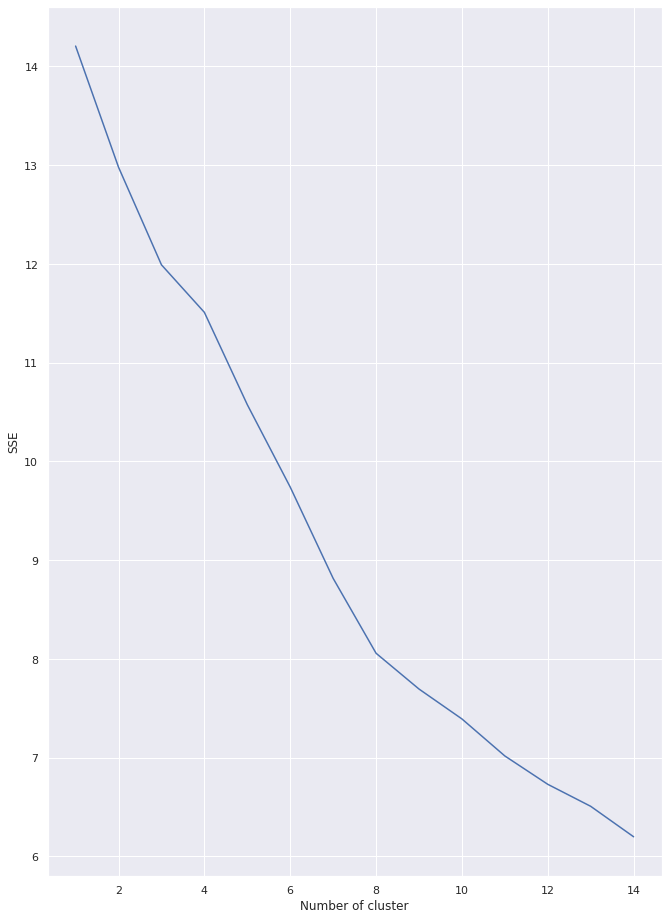

In [40]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))
    bangalore_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [41]:
kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))


KMeans(n_clusters=5, random_state=0)

In [42]:
bangalore_venues_grouped['Cluster'] = kmeans.labels_
bangalore_venues_grouped.groupby('Cluster')['Neighborhood'].count()


Cluster
0     3
1    23
2    25
3     5
4     6
Name: Neighborhood, dtype: int64

In [43]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues_grouped,on='Neighborhood')


In [44]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues,on='Neighborhood')

In [45]:
map_clusters = folium.Map(location=[bangalore_latitude, bangalore_longitude], zoom_start=11)


In [46]:
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [47]:
map_clusters

**Finding similar locations**

In [48]:
bangalore_population['Normalized_population'] = bangalore_population['Population']/bangalore_population['Population'].max(axis=0)
bangalore_population.head()

,Borough,Neighborhoods,Population,Normalized_population
0,Central,Cantonment area,866377,0.880810
1,Central,Domlur,743186,0.755567
2,Central,Indiranagar,474289,0.482190
3,Central,Jeevanbheemanagar,527874,0.536668
4,Central,Malleswaram,893629,0.908516


In [49]:
bangalore_income['Normalized_income'] = bangalore_income['AverageIncome']/bangalore_income['AverageIncome'].max(axis=0)
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome,Normalized_income
0,Central,Cantonment area,18944.099792,0.293051
1,Central,Domlur,56837.022198,0.879225
2,Central,Indiranagar,41991.817435,0.649581
3,Central,Jeevanbheemanagar,6667.447632,0.103140
4,Central,Malleswaram,53270.063892,0.824047


In [50]:
bangalore_veg = bangalore_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
bangalore_veg.head()

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Antique Shop,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,...,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Arekere,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,BTM Layout,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2,Banashankari,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Banaswadi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Basavanagudi,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
bangalore_veg['Venue Category_Vegetarian / Vegan Restaurant']


0     0
1     2
2     0
3     1
4     0
     ..
57    0
58    0
59    0
60    0
61    0
Name: Venue Category_Vegetarian / Vegan Restaurant, Length: 62, dtype: uint8

In [52]:
bangalore_veg = bangalore_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]
bangalore_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)
bangalore_veg.head()


,Neighborhood,NumberOfVegRestaurants
0,Arekere,0
1,BTM Layout,2
2,Banashankari,0
3,Banaswadi,1
4,Basavanagudi,0


In [54]:
bangalore_veg['NumberOfNonVeganrestaurants'] = 1-(bangalore_veg['NumberOfVegRestaurants']/bangalore_veg['NumberOfVegRestaurants'].max(axis=0))
bangalore_veg.head(10)


,Neighborhood,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Arekere,0,1.0
1,BTM Layout,2,0.0
2,Banashankari,0,1.0
3,Banaswadi,1,0.5
4,Basavanagudi,0,1.0
5,Basaveshwaranagar,0,1.0
6,Begur,0,1.0
7,Bellandur,0,1.0
8,Bommanahalli,0,1.0
9,Bommasandra,0,1.0


In [55]:
bangalore_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

In [56]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Whitefield']
target_cluster_dataframe.reset_index()


,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,564,Whitefield,Venue Category_Chinese Restaurant,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Bakery,Venue Category_Café,Venue Category_Market,...,0.0,0.0,2,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
1,565,Whitefield,Venue Category_Chinese Restaurant,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Bakery,Venue Category_Café,Venue Category_Market,...,0.0,0.0,2,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
2,566,Whitefield,Venue Category_Chinese Restaurant,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Bakery,Venue Category_Café,Venue Category_Market,...,0.0,0.0,2,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
3,567,Whitefield,Venue Category_Chinese Restaurant,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Bakery,Venue Category_Café,Venue Category_Market,...,0.0,0.0,2,Eastern,12.9698,77.7499,Royal Orchid Suites,12.966774,77.751262,Hotel
4,568,Whitefield,Venue Category_Chinese Restaurant,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Bakery,Venue Category_Café,Venue Category_Market,...,0.0,0.0,2,Eastern,12.9698,77.7499,The river side bar and kitchen,12.967298,77.749614,Hotel Bar
5,569,Whitefield,Venue Category_Chinese Restaurant,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Bakery,Venue Category_Café,Venue Category_Market,...,0.0,0.0,2,Eastern,12.9698,77.7499,Bangalore Mandarin,12.969631,77.750130,Chinese Restaurant
6,570,Whitefield,Venue Category_Chinese Restaurant,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Bakery,Venue Category_Café,Venue Category_Market,...,0.0,0.0,2,Eastern,12.9698,77.7499,Fabindia,12.972156,77.750447,Market
7,571,Whitefield,Venue Category_Chinese Restaurant,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Bakery,Venue Category_Café,Venue Category_Market,...,0.0,0.0,2,Eastern,12.9698,77.7499,Cheenavala,12.966435,77.749368,Kerala Restaurant
8,572,Whitefield,Venue Category_Chinese Restaurant,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Bakery,Venue Category_Café,Venue Category_Market,...,0.0,0.0,2,Eastern,12.9698,77.7499,refresh,12.965621,77.749234,Café


In [57]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']
target_cluster

2

In [58]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]

In [59]:
print("There are {} neighborhoods which has similar characteristics to Whitefield.".format(possible_neighborhoods.shape[0]))


There are 242 neighborhoods which has similar characteristics to Whitefield.


In [60]:
possible_neighborhoods.reset_index().head()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,60,Banashankari,Venue Category_Café,Venue Category_Fried Chicken Joint,Venue Category_Miscellaneous Shop,Venue Category_Indian Restaurant,Venue Category_Clothing Store,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Pizza Place,...,0.0,0.0,2,Southern,12.9255,77.5468,Anna Kuteera,12.926094,77.550367,Indian Restaurant
1,61,Banashankari,Venue Category_Café,Venue Category_Fried Chicken Joint,Venue Category_Miscellaneous Shop,Venue Category_Indian Restaurant,Venue Category_Clothing Store,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Pizza Place,...,0.0,0.0,2,Southern,12.9255,77.5468,cafe coffee day,12.924896,77.545873,Café
2,62,Banashankari,Venue Category_Café,Venue Category_Fried Chicken Joint,Venue Category_Miscellaneous Shop,Venue Category_Indian Restaurant,Venue Category_Clothing Store,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Pizza Place,...,0.0,0.0,2,Southern,12.9255,77.5468,Pizza Hut,12.924959,77.550755,Pizza Place
3,63,Banashankari,Venue Category_Café,Venue Category_Fried Chicken Joint,Venue Category_Miscellaneous Shop,Venue Category_Indian Restaurant,Venue Category_Clothing Store,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Pizza Place,...,0.0,0.0,2,Southern,12.9255,77.5468,Taaza tindi,12.926047,77.548575,Breakfast Spot
4,64,Banashankari,Venue Category_Café,Venue Category_Fried Chicken Joint,Venue Category_Miscellaneous Shop,Venue Category_Indian Restaurant,Venue Category_Clothing Store,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Pizza Place,...,0.0,0.0,2,Southern,12.9255,77.5468,Chicken Hunt,12.926350,77.548533,Fried Chicken Joint


In [61]:
possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [62]:
possible_neighborhoods = possible_neighborhoods.merge(bangalore_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_veg[['Neighborhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighborhoods')
possible_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Banashankari,Venue Category_Café,Venue Category_Fried Chicken Joint,Venue Category_Miscellaneous Shop,Venue Category_Indian Restaurant,Venue Category_Clothing Store,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Pizza Place,Venue Category_Lounge,...,Anna Kuteera,12.926094,77.550367,Indian Restaurant,810407,0.823908,57524.209528,0.889855,0,1.0
1,Banashankari,Venue Category_Café,Venue Category_Fried Chicken Joint,Venue Category_Miscellaneous Shop,Venue Category_Indian Restaurant,Venue Category_Clothing Store,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Pizza Place,Venue Category_Lounge,...,cafe coffee day,12.924896,77.545873,Café,810407,0.823908,57524.209528,0.889855,0,1.0
2,Banashankari,Venue Category_Café,Venue Category_Fried Chicken Joint,Venue Category_Miscellaneous Shop,Venue Category_Indian Restaurant,Venue Category_Clothing Store,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Pizza Place,Venue Category_Lounge,...,Pizza Hut,12.924959,77.550755,Pizza Place,810407,0.823908,57524.209528,0.889855,0,1.0
3,Banashankari,Venue Category_Café,Venue Category_Fried Chicken Joint,Venue Category_Miscellaneous Shop,Venue Category_Indian Restaurant,Venue Category_Clothing Store,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Pizza Place,Venue Category_Lounge,...,Taaza tindi,12.926047,77.548575,Breakfast Spot,810407,0.823908,57524.209528,0.889855,0,1.0
4,Banashankari,Venue Category_Café,Venue Category_Fried Chicken Joint,Venue Category_Miscellaneous Shop,Venue Category_Indian Restaurant,Venue Category_Clothing Store,Venue Category_Shoe Store,Venue Category_Breakfast Spot,Venue Category_Pizza Place,Venue Category_Lounge,...,Chicken Hunt,12.926350,77.548533,Fried Chicken Joint,810407,0.823908,57524.209528,0.889855,0,1.0


In [63]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonVeganrestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)
recommended_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants,Ranking
0,Malleswaram,Venue Category_Ice Cream Shop,Venue Category_Breakfast Spot,Venue Category_Playground,Venue Category_Bakery,Venue Category_Pharmacy,Venue Category_Indian Restaurant,Venue Category_Performing Arts Venue,Venue Category_Park,Venue Category_Paintball Field,...,13.001860,77.567340,Ice Cream Shop,893629,0.908516,53270.063892,0.824047,0,1.0,0.842674
1,Malleswaram,Venue Category_Ice Cream Shop,Venue Category_Breakfast Spot,Venue Category_Playground,Venue Category_Bakery,Venue Category_Pharmacy,Venue Category_Indian Restaurant,Venue Category_Performing Arts Venue,Venue Category_Park,Venue Category_Paintball Field,...,13.004432,77.564851,Playground,893629,0.908516,53270.063892,0.824047,0,1.0,0.842674
2,Malleswaram,Venue Category_Ice Cream Shop,Venue Category_Breakfast Spot,Venue Category_Playground,Venue Category_Bakery,Venue Category_Pharmacy,Venue Category_Indian Restaurant,Venue Category_Performing Arts Venue,Venue Category_Park,Venue Category_Paintball Field,...,13.000799,77.563924,Breakfast Spot,893629,0.908516,53270.063892,0.824047,0,1.0,0.842674
3,Malleswaram,Venue Category_Ice Cream Shop,Venue Category_Breakfast Spot,Venue Category_Playground,Venue Category_Bakery,Venue Category_Pharmacy,Venue Category_Indian Restaurant,Venue Category_Performing Arts Venue,Venue Category_Park,Venue Category_Paintball Field,...,13.006587,77.564354,Ice Cream Shop,893629,0.908516,53270.063892,0.824047,0,1.0,0.842674
4,Malleswaram,Venue Category_Ice Cream Shop,Venue Category_Breakfast Spot,Venue Category_Playground,Venue Category_Bakery,Venue Category_Pharmacy,Venue Category_Indian Restaurant,Venue Category_Performing Arts Venue,Venue Category_Park,Venue Category_Paintball Field,...,13.006615,77.564158,Indian Restaurant,893629,0.908516,53270.063892,0.824047,0,1.0,0.842674


In [64]:
top3 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [66]:
pd.DataFrame(top3).reset_index().head(3)

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Ranking
0,Banashankari,Venue Category_Café,Venue Category_Fried Chicken Joint,Venue Category_Miscellaneous Shop,[0.8234029969357849]
1,Basaveshwaranagar,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Fast Food Restaurant,[0.6426377807870477]
2,Bommanahalli,Venue Category_Indian Restaurant,Venue Category_Gym / Fitness Center,Venue Category_Pharmacy,[0.5365669702740494]


Here, according the data, we see that 'Banashankari,Basaveshwaranagar and Bommanahalli' are top 3 neighborhoods to find similar food to whitefield restaurant's veg food !¶


**Thank You**